In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
wk1_fumbles = pd.read_csv('data/wk1/fumbles.csv')

In [3]:
wk1_fumbles.head()

,team,player,fumbles,fumblesLost,fumblesRecovered
0,Detroit Lions,Marvin Jones Jr.,1,1,0
1,Detroit Lions,Frank Ragnow,1,0,0
2,Detroit Lions,Jared Goff,0,0,1
3,Kansas City Chiefs,Bryan Cook,0,0,1
4,Carolina Panthers,Miles Sanders,1,1,0


In [4]:
wk1_kicking = pd.read_csv('data/wk1/kicking.csv')
wk1_passing = pd.read_csv('data/wk1/passing.csv')
wk1_receiving = pd.read_csv('data/wk1/receiving.csv')
wk1_rushing = pd.read_csv('data/wk1/rushing.csv')

In [5]:
wk1_kicking.head()

,team,player,fieldGoalsMade/fieldGoalAttempts,fieldGoalPct,longFieldGoalMade,extraPointsMade/extraPointAttempts,totalKickingPoints
0,Detroit Lions,Riley Patterson,0/0,0.0,0,3/3,3
1,Kansas City Chiefs,Harrison Butker,2/2,100.0,39,2/2,8
2,Carolina Panthers,Eddy Pineiro,1/1,100.0,43,1/1,4
3,Atlanta Falcons,Younghoe Koo,1/1,100.0,49,3/3,6
4,Cincinnati Bengals,Evan McPherson,1/2,50.0,42,0/0,3


In [6]:
wk1_passing.head()

,team,player,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating
0,Detroit Lions,Jared Goff,22/35,253,7.2,1,0,1-3,74.1,94.1
1,Kansas City Chiefs,Patrick Mahomes,21/39,226,5.8,2,1,0-0,73.4,77.5
2,Carolina Panthers,Bryce Young,20/38,146,3.8,1,2,2-19,13.6,48.8
3,Atlanta Falcons,Desmond Ridder,15/18,115,6.4,1,0,4-24,27.1,111.8
4,Cincinnati Bengals,Joe Burrow,14/31,82,2.6,0,0,2-15,36.3,52.2


In [7]:
wk1_receiving.head()

,team,player,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets
0,Detroit Lions,Josh Reynolds,4,80,20.0,0,33,7
1,Detroit Lions,Amon-Ra St. Brown,6,71,11.8,1,21,9
2,Detroit Lions,Sam LaPorta,5,39,7.8,0,14,5
3,Detroit Lions,Kalif Raymond,1,20,20.0,0,20,1
4,Detroit Lions,Jahmyr Gibbs,2,18,9.0,0,10,2


In [8]:
wk1_rushing.head()

,team,player,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing
0,Detroit Lions,David Montgomery,21,74,3.5,1,8
1,Detroit Lions,Jahmyr Gibbs,7,42,6.0,0,18
2,Detroit Lions,Jalen Reeves-Maybin,1,3,3.0,0,3
3,Detroit Lions,Jared Goff,5,-1,-0.2,0,2
4,Kansas City Chiefs,Patrick Mahomes,6,45,7.5,0,16


In [9]:
offense = pd.concat([wk1_passing, wk1_receiving, wk1_rushing], axis=0)

In [10]:
offense.head()

,team,player,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing
0,Detroit Lions,Jared Goff,22/35,253.0,7.2,1.0,0.0,1-3,74.1,94.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kansas City Chiefs,Patrick Mahomes,21/39,226.0,5.8,2.0,1.0,0-0,73.4,77.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carolina Panthers,Bryce Young,20/38,146.0,3.8,1.0,2.0,2-19,13.6,48.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlanta Falcons,Desmond Ridder,15/18,115.0,6.4,1.0,0.0,4-24,27.1,111.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cincinnati Bengals,Joe Burrow,14/31,82.0,2.6,0.0,0.0,2-15,36.3,52.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# combine rows with the same player team
offense = offense.groupby(['player', 'team']).sum().reset_index()

In [12]:
offense[offense['player'] == 'Jared Goff']

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing
147,Jared Goff,Detroit Lions,22/35,253.0,7.2,1.0,0.0,1-3,74.1,94.1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-1.0,-0.2,0.0,2.0


In [13]:
points_per_passing_yard = 0.04
points_per_passing_td = 4
points_per_interception = -2
points_per_rushing_yard = 0.1
points_per_rushing_td = 6
points_per_reception = 1
points_per_receiving_yard = 0.1
points_per_receiving_td = 6

In [14]:
def get_player_points(row):
    points = 0
    points += row['passingYards'] * points_per_passing_yard
    points += row['passingTouchdowns'] * points_per_passing_td
    points += row['interceptions'] * points_per_interception
    points += row['rushingYards'] * points_per_rushing_yard
    points += row['rushingTouchdowns'] * points_per_rushing_td
    points += row['receptions'] * points_per_reception
    points += row['receivingYards'] * points_per_receiving_yard
    points += row['receivingTouchdowns'] * points_per_receiving_td

    return points

offense['fantasy_points'] = offense.apply(get_player_points, axis=1)

In [15]:
offense.head()

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing,fantasy_points
0,A.J. Brown,Philadelphia Eagles,0,0.0,0.0,0.0,0.0,0,0.0,0.0,7.0,79.0,11.3,0.0,23.0,10.0,0.0,0.0,0.0,0.0,0.0,14.9
1,AJ Dillon,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,17.0,8.5,0.0,12.0,3.0,13.0,19.0,1.5,0.0,7.0,5.6
2,Aaron Jones,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,86.0,43.0,1.0,51.0,4.0,9.0,41.0,4.6,1.0,9.0,26.7
3,Aaron Rodgers,New York Jets,0/1,0.0,0.0,0.0,0.0,1-10,2.1,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adam Thielen,Carolina Panthers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,12.0,6.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,3.2


### Data Cleaning

In [16]:
def create_offense_dataframe(week_number):
    passing = pd.read_csv('data/' + week_number + '/passing.csv')
    receiving = pd.read_csv('data/' + week_number + '/receiving.csv')
    rushing = pd.read_csv('data/' + week_number + '/rushing.csv')
    total_offense = pd.concat([passing, receiving, rushing], axis=0)
    # print(total_offense.shape)
    total_offense = total_offense.groupby(['player', 'team']).sum().reset_index()
    # print(total_offense.shape)
    total_offense['fantasy_points'] = total_offense.apply(get_player_points, axis=1)
    total_offense['week'] = week_number[-1]
    return total_offense

In [17]:
weeks_list = ['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10']

all_weeks = pd.concat([create_offense_dataframe(week) for week in weeks_list], axis=0)

In [18]:
all_weeks.head()

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing,fantasy_points,week
0,A.J. Brown,Philadelphia Eagles,0,0.0,0.0,0.0,0.0,0,0.0,0.0,7.0,79.0,11.3,0.0,23.0,10.0,0.0,0.0,0.0,0.0,0.0,14.9,1
1,AJ Dillon,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,17.0,8.5,0.0,12.0,3.0,13.0,19.0,1.5,0.0,7.0,5.6,1
2,Aaron Jones,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,86.0,43.0,1.0,51.0,4.0,9.0,41.0,4.6,1.0,9.0,26.7,1
3,Aaron Rodgers,New York Jets,0/1,0.0,0.0,0.0,0.0,1-10,2.1,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Adam Thielen,Carolina Panthers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,12.0,6.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,3.2,1


In [19]:
all_weeks.shape

(2970, 23)

### EDA

In [20]:
all_weeks['next_week_fantasy_points'] = all_weeks.groupby('player')['fantasy_points'].shift(-1)

In [68]:
# create a linear regression model to predict fantasy points
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# drop nan values
df = all_weeks.dropna()

X = df[['passingYards', 'passingTouchdowns', 'interceptions', 'rushingYards', 'rushingTouchdowns', 'receptions', 'receivingYards', 'receivingTouchdowns', 'receivingTargets']]
y = df['next_week_fantasy_points']

c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='passingYards', ylabel='next_week_fantasy_points'>

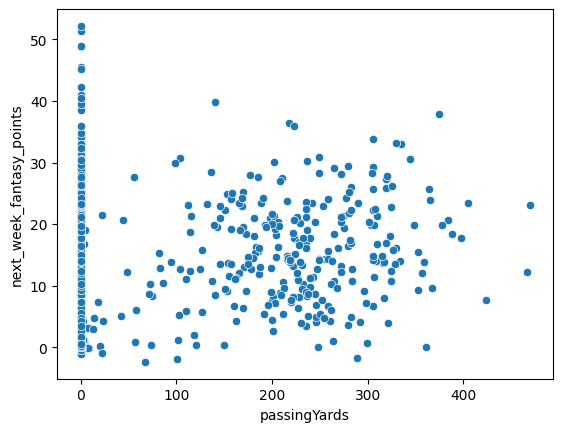

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(x='passingYards', y='next_week_fantasy_points', data=all_weeks)   

c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='rushingYards', ylabel='next_week_fantasy_points'>

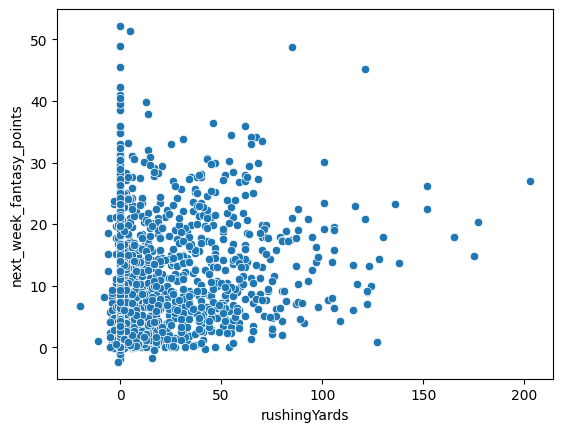

In [70]:
sns.scatterplot(x='rushingYards', y='next_week_fantasy_points', data=all_weeks)  

c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruppea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '19.0'),
  Text(18, 0, '20.0')])

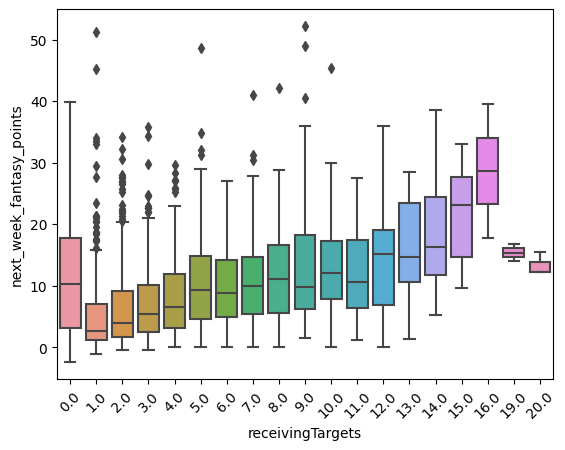

In [71]:
sns.boxplot(x='receivingTargets', y='next_week_fantasy_points', data=all_weeks)
# rotate x-axis labels
plt.xticks(rotation=45)

In [72]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# create the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# mse on predictions
mean_squared_error(y_test, y_pred)

48.576904525594216

In [74]:
X_test[:10]

,passingYards,passingTouchdowns,interceptions,rushingYards,rushingTouchdowns,receptions,receivingYards,receivingTouchdowns,receivingTargets
160,0.0,0.0,0.0,0.0,0.0,8.0,57.0,0.0,12.0
45,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,3.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
213,0.0,0.0,0.0,0.0,0.0,1.0,46.0,0.0,1.0
264,0.0,0.0,0.0,41.0,0.0,4.0,37.0,0.0,4.0
57,0.0,0.0,0.0,0.0,0.0,6.0,75.0,0.0,6.0
110,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
180,0.0,0.0,0.0,0.0,0.0,4.0,43.0,1.0,6.0
249,0.0,0.0,0.0,0.0,0.0,3.0,35.0,0.0,3.0
219,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y_pred[:10]

array([13.9766977 ,  5.82285586,  4.78914028,  5.98508662, 10.84528554,
       10.68667328,  3.82121623,  8.56522139,  7.01125986,  3.67305141])

In [76]:
test = all_weeks[all_weeks['player'] == 'Jared Goff'].iloc[0]

In [77]:
test['next_week_fantasy_points']

22.92

In [78]:
# do a test with jared goff
jared = all_weeks[(all_weeks['player'] == 'Jared Goff') & (all_weeks['week'] == '0')]

# make a prediction for jared goff
model.predict(jared[['passingYards', 'passingTouchdowns', 'interceptions', 'rushingYards', 'rushingTouchdowns', 'receptions', 'receivingYards', 'receivingTouchdowns', 'receivingTargets']])

array([16.326572])

In [79]:
jared.head()

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing,fantasy_points,week,next_week_fantasy_points
134,Jared Goff,Detroit Lions,23/33,333.0,10.1,2.0,0.0,0-0,76.4,122.4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.0,-0.7,0.0,0.0,21.12,0,NaN


### Trying out specified models

In [44]:
qbs = all_weeks[all_weeks['passingYards'] != 0]
qbs['completions'] = qbs['completions/passingAttempts'].apply(lambda x: int(x.split('/')[0]))
qbs['passingAttempts'] = qbs['completions/passingAttempts'].apply(lambda x: int(x.split('/')[1]))

C:\Users\ruppea\AppData\Local\Temp\ipykernel_22488\2258289949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['completions'] = qbs['completions/passingAttempts'].apply(lambda x: int(x.split('/')[0]))
C:\Users\ruppea\AppData\Local\Temp\ipykernel_22488\2258289949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['passingAttempts'] = qbs['completions/passingAttempts'].apply(lambda x: int(x.split('/')[1]))


In [45]:
qbs.head()

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing,fantasy_points,week,next_week_fantasy_points,completions,passingAttempts
15,Anthony Richardson,Indianapolis Colts,24/37,223.0,6.0,1.0,1.0,4-8,29.5,79.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,40.0,4.0,1.0,12.0,20.92,1,17.74,24,37
19,Baker Mayfield,Tampa Bay Buccaneers,21/34,173.0,5.1,2.0,0.0,1-4,58.3,94.4,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,1.4,0.0,5.0,16.02,1,18.38,21,34
30,Brock Purdy,San Francisco 49ers,19/29,220.0,7.6,2.0,0.0,3-17,93.2,111.3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,6.7,0.0,17.0,18.80,1,14.74,19,29
32,Bryce Young,Carolina Panthers,20/38,146.0,3.8,1.0,2.0,2-19,13.6,48.8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,5.7,0.0,16.0,7.54,1,13.52,20,38
35,C.J. Stroud,Houston Texans,28/44,242.0,5.5,0.0,0.0,5-46,36.0,78.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,20.0,5.0,0.0,11.0,12.68,1,23.46,28,44


In [34]:
non_qbs = all_weeks[all_weeks['passingYards'] == 0]

In [35]:
non_qbs.head()

,player,team,completions/passingAttempts,passingYards,yardsPerPassAttempt,passingTouchdowns,interceptions,sacks-sackYardsLost,adjQBR,QBRating,receptions,receivingYards,yardsPerReception,receivingTouchdowns,longReception,receivingTargets,rushingAttempts,rushingYards,yardsPerRushAttempt,rushingTouchdowns,longRushing,fantasy_points,week,next_week_fantasy_points
0,A.J. Brown,Philadelphia Eagles,0,0.0,0.0,0.0,0.0,0,0.0,0.0,7.0,79.0,11.3,0.0,23.0,10.0,0.0,0.0,0.0,0.0,0.0,14.9,1,6.9
1,AJ Dillon,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,17.0,8.5,0.0,12.0,3.0,13.0,19.0,1.5,0.0,7.0,5.6,1,7.3
2,Aaron Jones,Green Bay Packers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,86.0,43.0,1.0,51.0,4.0,9.0,41.0,4.6,1.0,9.0,26.7,1,2.4
3,Aaron Rodgers,New York Jets,0/1,0.0,0.0,0.0,0.0,1-10,2.1,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
4,Adam Thielen,Carolina Panthers,0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,12.0,6.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,3.2,1,18.4


In [46]:
qbs.dropna(inplace=True)
qb_X = qbs[['passingYards', 'passingTouchdowns', 'interceptions', 'rushingYards', 'rushingTouchdowns', 'completions', 'passingAttempts']]
qb_y = qbs['next_week_fantasy_points']

C:\Users\ruppea\AppData\Local\Temp\ipykernel_22488\2067117080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs.dropna(inplace=True)


In [47]:
# do a train test split
qb_X_train, qb_X_test, qb_y_train, qb_y_test = train_test_split(qb_X, qb_y, test_size=0.2, random_state=42)

In [48]:
# create an xgboost model for qbs
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [49]:
# fit the model
model.fit(qb_X_train, qb_y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [50]:
normal = LinearRegression()
normal.fit(qb_X_train, qb_y_train)

LinearRegression()

In [51]:
# evaluate both models
qb_y_pred = model.predict(qb_X_test)
normal_y_pred = normal.predict(qb_X_test)

In [52]:
# mse on predictions
mean_squared_error(qb_y_test, qb_y_pred)

55.198866061400295

In [53]:
mean_squared_error(qb_y_test, normal_y_pred)

54.95239078891193

In [54]:
# create a train test split for non_qbs
non_qbs.dropna(inplace=True)
non_qb_X = non_qbs[['rushingYards', 'rushingTouchdowns', 'receptions', 'receivingYards', 'receivingTouchdowns', 'receivingTargets']]
non_qb_y = non_qbs['next_week_fantasy_points']

non_qb_X_train, non_qb_X_test, non_qb_y_train, non_qb_y_test = train_test_split(non_qb_X, non_qb_y, test_size=0.2, random_state=42)

C:\Users\ruppea\AppData\Local\Temp\ipykernel_22488\965818200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_qbs.dropna(inplace=True)


In [55]:
# create an xgboost model for non_qbs
model = xgb.XGBRegressor(objective ='reg:squarederror')

model.fit(non_qb_X_train, non_qb_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
normal = LinearRegression()
normal.fit(non_qb_X_train, non_qb_y_train)

LinearRegression()

In [57]:
# evaluate both models
non_qb_y_pred = model.predict(non_qb_X_test)
normal_y_pred = normal.predict(non_qb_X_test)

In [58]:
# mse on predictions
mean_squared_error(non_qb_y_test, non_qb_y_pred)

53.124647850940676

In [59]:
# mse on predictions
mean_squared_error(non_qb_y_test, normal_y_pred)

37.31467637551185

In [62]:
# Do a random forest model for non_qbs
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

model.fit(non_qb_X_train, non_qb_y_train)

# evaluate both models
non_qb_y_pred = model.predict(non_qb_X_test)

# mse on predictions
mean_squared_error(non_qb_y_test, non_qb_y_pred)

35.6279217030248